In [2]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

## Load lipid data

In [3]:
lipid_data_df = pd.read_csv(f'all_data.csv')

In [4]:
lipid_data_df

,Date,Blood Type,Person,Cer d18:2_16:0,Cer d18:1_18:0,Cer d18:1_18:1,Cer d18:1_16:0,Cer d18:1_20:0,Cer d18:1_22:0,Cer d18:1_24:0,...,LPC 22:6 SN1,LPC O-22:1,PC 18:0_16:0,PC 18:0_22:5,PC 19:0_20:4,PC O-18:0_22:4,PC O-18:2_20:4,PC O-24:2_20:4,PE O-18:3_20:4,PI 18:0_22:5
0,210625,Plasma,1,0.05,0.27,0.08,0.52,0.82,3.37,9.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,210625,Serum,1,0.05,0.30,0.08,0.58,0.84,4.08,11.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210625,Blood EDTA - Serum,1,0.07,0.82,0.11,1.71,0.88,4.12,11.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210625,DBS - Venous,1,0.07,0.42,0.06,1.08,0.43,3.09,5.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,210625,DBS - Finger,1,0.06,0.32,0.05,0.89,0.37,2.23,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,210702,Plasma,1,0.04,0.25,0.11,0.47,0.72,3.74,10.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,210702,Serum,1,0.22,0.46,0.22,0.78,1.53,7.33,20.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,210702,Blood EDTA - Serum,1,0.11,1.32,0.17,3.60,0.90,4.81,12.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,210702,DBS - Venous,1,0.08,0.46,0.06,1.27,0.52,3.47,6.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,210702,DBS - Finger,1,0.04,0.33,0.06,0.80,0.33,2.21,4.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pair-wise scatter plots

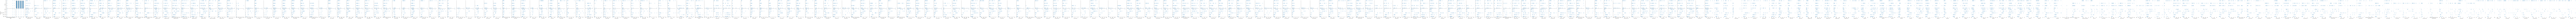

In [5]:
sns.pairplot(lipid_data_df, y_vars=["Person", 'Blood Type'])

# Dimension reduction

## PCA

In [119]:
pca = PCA(n_components=4)
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')
lipid_data_df_without_na_normalized = (lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date'])-
                            lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date']).mean())/lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date']).std()
projected_lipid_data = pca.fit_transform(lipid_data_df_without_na_normalized)

In [120]:
pca.explained_variance_ratio_

array([0.39384317, 0.21649259, 0.07768939, 0.07050358])

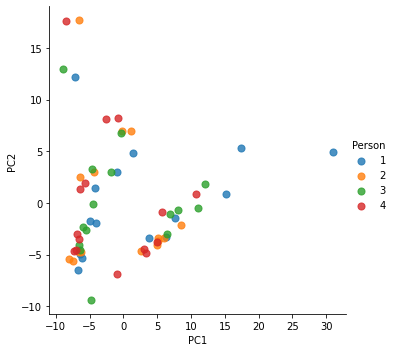

In [121]:
pc_df = pd.DataFrame(data = projected_lipid_data , 
        columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df['Blood Type'] = lipid_data_df['Blood Type']
pc_df['Person'] = lipid_data_df['Person']

lmplot_persons = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Person', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_persons.savefig('persons_pca.pdf')

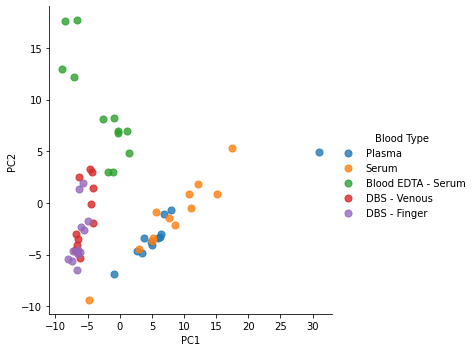

In [122]:
lmplot_type = sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Blood Type', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_type.savefig('type_pca.pdf')

## t-SNE

In [123]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
projected_lipid_data = tsne.fit_transform(lipid_data_df_without_na.drop(
    columns=['Person', 'Blood Type', 'Date']))

/home/tony/.virtualenvs/lipid-study/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


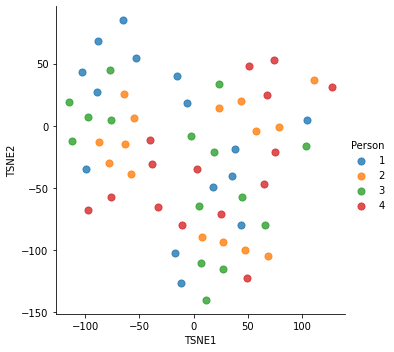

In [124]:
pc_df = pd.DataFrame(data = projected_lipid_data , 
        columns = ['TSNE1', 'TSNE2'])
pc_df['Blood Type'] = lipid_data_df['Blood Type']
pc_df['Person'] = lipid_data_df['Person']

lmplot_persons = sns.lmplot( x="TSNE1", y="TSNE2",
  data=pc_df, 
  fit_reg=False, 
  hue='Person', # color by cluster
  legend=True,
  scatter_kws={"s": 50}) # specify the point size
lmplot_persons.savefig('persons_tsne.pdf')

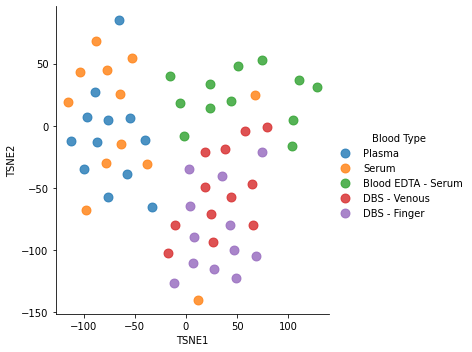

In [125]:
lmplot_type = sns.lmplot( x="TSNE1", y="TSNE2",
  data=pc_df, 
  fit_reg=False, 
  hue='Blood Type', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
lmplot_type.savefig('type_tsne.pdf')

In [137]:
plasma = lipid_data_df_without_na[lipid_data_df_without_na['Blood Type'] == 'Plasma'].drop(
    columns=['Person', 'Blood Type', 'Date'])
serum = lipid_data_df_without_na[lipid_data_df_without_na['Blood Type'] == 'Serum'].drop(
    columns=['Person', 'Blood Type', 'Date'])
blood_edta = lipid_data_df_without_na[lipid_data_df_without_na['Blood Type'] == 'Blood EDTA - Serum'].drop(
    columns=['Person', 'Blood Type', 'Date'])
dbs_venous = lipid_data_df_without_na[lipid_data_df_without_na['Blood Type'] == 'DBS - Venous'].drop(
    columns=['Person', 'Blood Type', 'Date'])
dbs_finger = lipid_data_df_without_na[lipid_data_df_without_na['Blood Type'] == 'DBS - Finger'].drop(
    columns=['Person', 'Blood Type', 'Date'])
method_dict = {'Plasma': plasma, 
              'Serum':serum,
              'Blood EDTA - Serum': blood_edta,
              'DBS - Venous': dbs_venous,
              'DBS - Finger': dbs_finger}

# Distribuion comparison

## Shapiro-Wilk test for normality

In [146]:
from scipy.stats import shapiro
for key, value in method_dict.items():
    counter = 0
    column = []
    for k in value.keys():
        _, pvalue = shapiro(value[k])
        if pvalue <= 0.01:
            counter += 1
    print(counter)

60
17
30
19
21


## Wilcoxon signed-rank test

<AxesSubplot:>

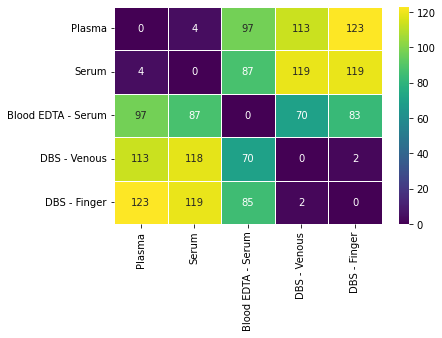

In [150]:
import scipy.stats as stats

matrix = []
for first_key, first_value in method_dict.items():
    column = []
    for second_key, second_value in method_dict.items():
        counter = 0
        if first_key != second_key:
            for k in first_value.keys():
                statistics, pvalue = stats.wilcoxon(first_value[k], second_value[k])
                if pvalue <= 0.01:
                    counter += 1
        column.append(counter)
    matrix.append(column)

sns.heatmap(matrix, annot=True, linewidths=0.5, cmap='viridis',
            xticklabels=method_dict.keys(), yticklabels=method_dict.keys(), fmt='g')

# Train classifier

In [157]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
min_samples_split = [1, 2, 3, 5]
min_samples_leaf = [1, 2, 4]
# Create the grid
param_grid = {'estimator__n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
              # 'min_samples_split': min_samples_split,
               'estimator__min_samples_leaf': min_samples_leaf}
random_forest = RandomForestClassifier()

## All

In [151]:
all_true = []
all_prediction = []
num_classes = len(lipid_data_df_without_na['Blood Type'].unique())
confusion_matrix_type = np.zeros([num_classes, num_classes])
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')
lipid_x = lipid_data_df_without_na.drop(columns=['Person', 'Blood Type', 'Date'])
label_encoder = LabelEncoder()
blood_type = label_encoder.fit_transform(lipid_data_df_without_na['Blood Type'])
auroc_list = []
outer_groups = lipid_data_df_without_na['Person']
logo = LeaveOneGroupOut()
for train_index, test_index in logo.split(lipid_x, groups=outer_groups):
    train_val_data = lipid_x.loc[train_index]
    test_data = lipid_x.loc[test_index]
    blood_type_test_val = blood_type[train_index]
    blood_type_test = blood_type[test_index]
    inner_groups = outer_groups.loc[train_index]
    grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid, 
                          cv = logo, n_jobs = -1, verbose = 1)
    clf = grid_search.fit(train_val_data,  blood_type_test_val, groups = inner_groups)
    
    # test stuff
    y_pred_proba = clf.predict_proba(test_data)
    y_pred = clf.predict(test_data)
    all_true.extend(blood_type_test)
    all_prediction.extend(y_pred_proba)
    confusion_matrix_type += confusion_matrix(blood_type_test, y_pred)

NameError: name 'random_forest' is not defined

<AxesSubplot:>

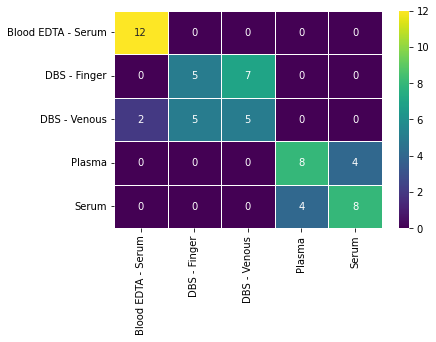

In [104]:
sns.heatmap(confusion_matrix_type, annot=True, linewidths=1, cmap='viridis',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

In [106]:
roc_auc_score(all_true, all_prediction, multi_class='ovo')

0.9027777777777777

## OvR

In [167]:
from sklearn.multiclass import OneVsRestClassifier

all_true = []
all_prediction = []
confusion_matrix_type = []
lipid_data_df_without_na = lipid_data_df.dropna(axis='columns')
lipid_x = lipid_data_df_without_na.drop(columns=['Person', 'Blood Type', 'Date'])
label_encoder = LabelEncoder()
blood_type = label_encoder.fit_transform(lipid_data_df['Blood Type'])

auroc_list = []
outer_groups = lipid_data_df_without_na['Person']
logo = LeaveOneGroupOut()
OneVsRestClassifier(random_forest)
for train_index, test_index in logo.split(lipid_x, groups=outer_groups):
    train_val_data = lipid_x.loc[train_index]
    test_data = lipid_x.loc[test_index]
    blood_type_test_val = blood_type[train_index]
    blood_type_test = blood_type[test_index]
    inner_groups = outer_groups.loc[train_index]
    grid_search = GridSearchCV(estimator = ovr_random_forest, param_grid = param_grid, 
                          cv = logo, n_jobs = -1, verbose = 1)
    clf = grid_search.fit(train_val_data, blood_type_test_val, groups = inner_groups)
    
    # test stuff
    y_pred_proba = clf.predict_proba(test_data)
    y_pred = clf.predict(test_data)
    print(y_pred_proba)
    all_true.extend(blood_type_test)
    all_prediction.extend(y_pred_proba)
    confusion_matrix_type.append(confusion_matrix(blood_type_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[[0.18972088 0.00631437 0.01001279 0.31705584 0.47689611]
 [0.21396333 0.01179554 0.00905729 0.30268373 0.46250012]
 [0.60865072 0.05813702 0.09340438 0.08466315 0.15514472]
 [0.05305207 0.35368411 0.45297225 0.09325401 0.04703756]
 [0.0655018  0.37752866 0.45379192 0.06452452 0.0386531 ]
 [0.1790028  0.00275814 0.00870886 0.50094214 0.30858806]
 [0.18877252 0.01268838 0.02149696 0.28873662 0.48830551]
 [0.59672827 0.17780307 0.13426558 0.05085963 0.04034345]
 [0.27563444 0.18046277 0.40800437 0.08222453 0.05367388]
 [0.01555365 0.53701042 0.32417794 0.0885862  0.03467179]
 [0.15614348 0.01769287 0.02377772 0.47243976 0.32994617]
 [0.16755602 0.00142647 0.00672478 0.46178929 0.36250344]
 [0.53284589 0.1102897  0.13566796 0.12423862 0.09695783]
 [0.         0.53718243 0.36273774 0.06376575 0.03631408]
 [0.00842665 0.53716911 0.31731535 0.09989488 0.03719401]]
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[[0.010

## OVO